<a href="https://colab.research.google.com/github/abou-zithar/ZEP_task_Retail__shipping__goods_to_USA/blob/main/ZEP_task_Retail__shipping__goods_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# connect to drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# use pandas to read data 
filepath='/content/drive/MyDrive/datasets/ZepDataSet.xlsx'
data=pd.read_excel(filepath,parse_dates=['location_arrival_date','location_departure_date','origin_departure_date','train_arrival_date'])

In [4]:
data.head()

,tripuid,origin_location,destination_location,sighting_location,sighting_location_lat,sighting_location_lon,location_arrival_date,location_departure_date,origin_departure_date,train_arrival_date
0,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","STERLING HEIGHTS, MI",42.537908,-83.037650,2021-04-30 19:28:00,2021-04-30 19:28:00,2021-04-30 19:28:00,2021-05-03 12:21:00
1,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","WARREN, MI",42.499210,-83.037413,2021-04-30 21:45:00,2021-04-30 21:46:00,2021-04-30 19:28:00,2021-05-03 12:21:00
2,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","DETROIT STERLING, MI",42.572998,-83.040002,2021-05-01 00:00:00,2021-05-01 12:30:00,2021-04-30 19:28:00,2021-05-03 12:21:00
3,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","DETROIT NORTH YARD, MI",42.406106,-83.037049,2021-05-01 13:30:00,2021-05-01 15:30:00,2021-04-30 19:28:00,2021-05-03 12:21:00
4,10054656400104001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","OAKWOOD, MI",42.278053,-83.170834,2021-05-01 18:17:00,2021-05-01 18:17:00,2021-04-30 19:28:00,2021-05-03 12:21:00


In [5]:
data.tail()

,tripuid,origin_location,destination_location,sighting_location,sighting_location_lat,sighting_location_lon,location_arrival_date,location_departure_date,origin_departure_date,train_arrival_date
1605,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","CLAPPER, MO",39.588213,-91.845766,2020-08-13 04:24:00,2020-08-13 04:24:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1606,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","MOBERLY, MO",39.419797,-92.436711,2020-08-13 05:23:00,2020-08-13 05:43:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1607,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","CLIFTON HILL, MO",39.438175,-92.665850,2020-08-13 07:01:00,2020-08-13 07:01:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1608,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","MISSOURI CITY, MO",39.223788,-94.321008,2020-08-13 12:25:00,2020-08-13 12:25:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1609,10063453900023001315859000566790000,"STEHEIGHT, MI","VOLTZ, MO","VOLTZ, MO",39.186341,-94.429775,2020-08-13 13:24:00,2020-08-13 16:30:00,2020-08-11 04:24:00,2020-08-13 13:24:00


In [6]:
data.drop(['tripuid'],inplace=True,axis=1)

In [7]:
data['origin_location'].unique()

array(['STEHEIGHT, MI'], dtype=object)

In [8]:
data['destination_location'].unique()

array(['VOLTZ, MO'], dtype=object)

In [9]:
data.drop(['destination_location','origin_location'],inplace=True,axis=1)

In [10]:
data.duplicated().sum()

2

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.head()

,sighting_location,sighting_location_lat,sighting_location_lon,location_arrival_date,location_departure_date,origin_departure_date,train_arrival_date
0,"STERLING HEIGHTS, MI",42.537908,-83.037650,2021-04-30 19:28:00,2021-04-30 19:28:00,2021-04-30 19:28:00,2021-05-03 12:21:00
1,"WARREN, MI",42.499210,-83.037413,2021-04-30 21:45:00,2021-04-30 21:46:00,2021-04-30 19:28:00,2021-05-03 12:21:00
2,"DETROIT STERLING, MI",42.572998,-83.040002,2021-05-01 00:00:00,2021-05-01 12:30:00,2021-04-30 19:28:00,2021-05-03 12:21:00
3,"DETROIT NORTH YARD, MI",42.406106,-83.037049,2021-05-01 13:30:00,2021-05-01 15:30:00,2021-04-30 19:28:00,2021-05-03 12:21:00
4,"OAKWOOD, MI",42.278053,-83.170834,2021-05-01 18:17:00,2021-05-01 18:17:00,2021-04-30 19:28:00,2021-05-03 12:21:00


In [13]:
data.tail()

,sighting_location,sighting_location_lat,sighting_location_lon,location_arrival_date,location_departure_date,origin_departure_date,train_arrival_date
1605,"CLAPPER, MO",39.588213,-91.845766,2020-08-13 04:24:00,2020-08-13 04:24:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1606,"MOBERLY, MO",39.419797,-92.436711,2020-08-13 05:23:00,2020-08-13 05:43:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1607,"CLIFTON HILL, MO",39.438175,-92.665850,2020-08-13 07:01:00,2020-08-13 07:01:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1608,"MISSOURI CITY, MO",39.223788,-94.321008,2020-08-13 12:25:00,2020-08-13 12:25:00,2020-08-11 04:24:00,2020-08-13 13:24:00
1609,"VOLTZ, MO",39.186341,-94.429775,2020-08-13 13:24:00,2020-08-13 16:30:00,2020-08-11 04:24:00,2020-08-13 13:24:00


In [14]:
data.shape

(1608, 7)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1609
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sighting_location        1608 non-null   object        
 1   sighting_location_lat    1608 non-null   float64       
 2   sighting_location_lon    1608 non-null   float64       
 3   location_arrival_date    1608 non-null   datetime64[ns]
 4   location_departure_date  1608 non-null   datetime64[ns]
 5   origin_departure_date    1608 non-null   datetime64[ns]
 6   train_arrival_date       1608 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(2), object(1)
memory usage: 100.5+ KB


<h4> as we can see the data has no nulls and the data is datatime64 type 

In [16]:
def getDeltaOfTiem(feature_from,feature_to):
  data['Trip_time'] = (data[feature_from] - data[feature_to])

  # create a column with timedelta as total hours, as a float type
  data['tot_hour_diff'] = (data[feature_from] - data[feature_to]) / pd.Timedelta(hours=1)

  # create a colume with timedelta as total minutes, as a float type
  data['tot_mins_diff'] = (data[feature_from] - data[feature_to]) / pd.Timedelta(minutes=1)

getDeltaOfTiem('train_arrival_date','origin_departure_date')

In [17]:
data['Trip_time']

0      2 days 16:53:00
1      2 days 16:53:00
2      2 days 16:53:00
3      2 days 16:53:00
4      2 days 16:53:00
             ...      
1605   2 days 09:00:00
1606   2 days 09:00:00
1607   2 days 09:00:00
1608   2 days 09:00:00
1609   2 days 09:00:00
Name: Trip_time, Length: 1608, dtype: timedelta64[ns]

In [18]:
def recreateTimeAndDateFeatures(Feature):
  data['Y_'+Feature] = [d.year for d in data[Feature]]
  data['M_'+Feature] = [d.month for d in data[Feature]]
  data['D_'+Feature] = [d.day for d in data[Feature]]
  data['H_'+Feature] = [d.hour for d in data[Feature]]
  data['M_'+Feature] = [d.minute for d in data[Feature]]



recreateTimeAndDateFeatures('location_arrival_date')
recreateTimeAndDateFeatures('location_departure_date')
recreateTimeAndDateFeatures('origin_departure_date')
recreateTimeAndDateFeatures('train_arrival_date')
data.drop(['location_arrival_date','location_departure_date','origin_departure_date','train_arrival_date'],inplace=True,axis=1)

In [19]:
data.head()

,sighting_location,sighting_location_lat,sighting_location_lon,Trip_time,tot_hour_diff,tot_mins_diff,Y_location_arrival_date,M_location_arrival_date,D_location_arrival_date,H_location_arrival_date,...,D_location_departure_date,H_location_departure_date,Y_origin_departure_date,M_origin_departure_date,D_origin_departure_date,H_origin_departure_date,Y_train_arrival_date,M_train_arrival_date,D_train_arrival_date,H_train_arrival_date
0,"STERLING HEIGHTS, MI",42.537908,-83.037650,2 days 16:53:00,64.883333,3893.0,2021,28,30,19,...,30,19,2021,28,30,19,2021,21,3,12
1,"WARREN, MI",42.499210,-83.037413,2 days 16:53:00,64.883333,3893.0,2021,45,30,21,...,30,21,2021,28,30,19,2021,21,3,12
2,"DETROIT STERLING, MI",42.572998,-83.040002,2 days 16:53:00,64.883333,3893.0,2021,0,1,0,...,1,12,2021,28,30,19,2021,21,3,12
3,"DETROIT NORTH YARD, MI",42.406106,-83.037049,2 days 16:53:00,64.883333,3893.0,2021,30,1,13,...,1,15,2021,28,30,19,2021,21,3,12
4,"OAKWOOD, MI",42.278053,-83.170834,2 days 16:53:00,64.883333,3893.0,2021,17,1,18,...,1,18,2021,28,30,19,2021,21,3,12


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1609
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   sighting_location          1608 non-null   object         
 1   sighting_location_lat      1608 non-null   float64        
 2   sighting_location_lon      1608 non-null   float64        
 3   Trip_time                  1608 non-null   timedelta64[ns]
 4   tot_hour_diff              1608 non-null   float64        
 5   tot_mins_diff              1608 non-null   float64        
 6   Y_location_arrival_date    1608 non-null   int64          
 7   M_location_arrival_date    1608 non-null   int64          
 8   D_location_arrival_date    1608 non-null   int64          
 9   H_location_arrival_date    1608 non-null   int64          
 10  Y_location_departure_date  1608 non-null   int64          
 11  M_location_departure_date  1608 non-null   int64        

<h1> Visualization⌛

In [21]:
import seaborn as sns

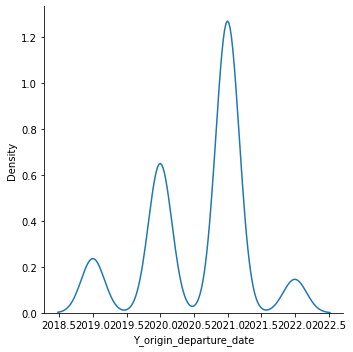

In [22]:

sns.displot(data=data, x="Y_origin_departure_date", kind="kde")

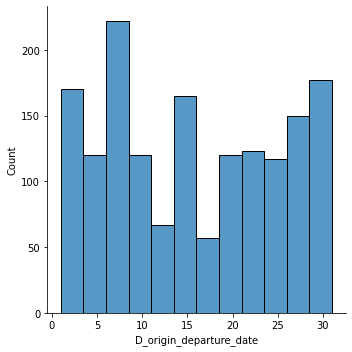

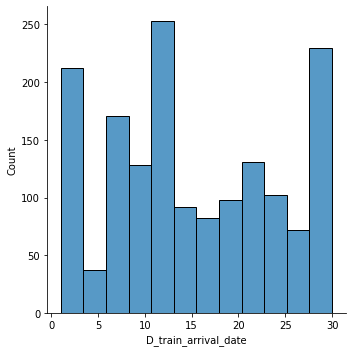

In [23]:

sns.displot(data=data, x="D_origin_departure_date")
sns.displot(data=data, x="D_train_arrival_date")


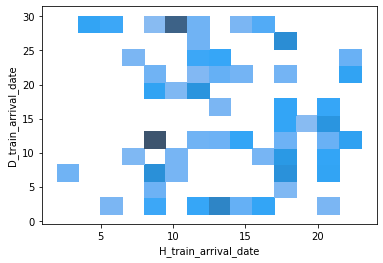

In [24]:
sns.histplot(data=data,x='H_train_arrival_date',y='D_train_arrival_date')

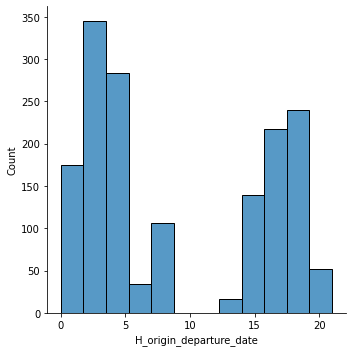

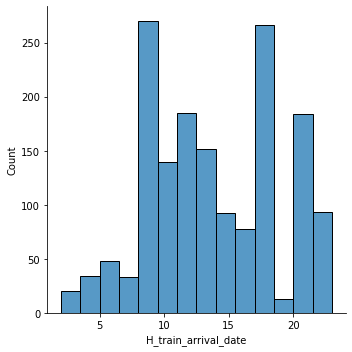

In [25]:
sns.displot(data=data, x="H_origin_departure_date")
sns.displot(data=data, x="H_train_arrival_date")

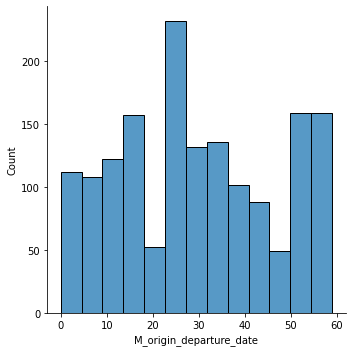

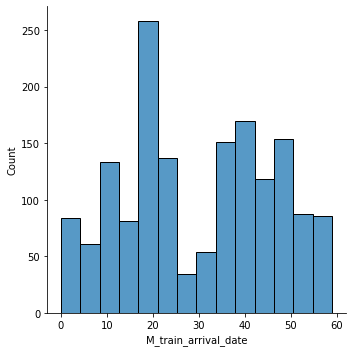

In [26]:
sns.displot(data=data, x="M_origin_departure_date")
sns.displot(data=data, x="M_train_arrival_date")